## Harvest

### Crop Recommendation

#### Import Library 

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Reading Dataset

In [27]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Statistic Description 

In [29]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Target Variable

In [30]:
crop['label'].value_counts()

pomegranate    100
watermelon     100
coffee         100
orange         100
blackgram      100
apple          100
lentil         100
maize          100
muskmelon      100
pigeonpeas     100
chickpea       100
cotton         100
banana         100
grapes         100
mungbean       100
papaya         100
mothbeans      100
coconut        100
jute           100
mango          100
rice           100
kidneybeans    100
Name: label, dtype: int64

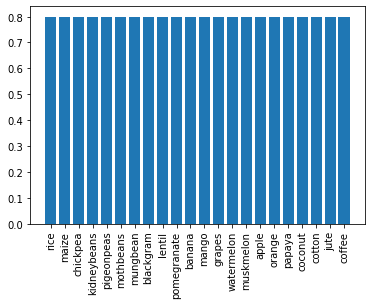

In [31]:
plt.bar(crop['label'],height=0.8)
plt.xticks(rotation=90)
plt.show()

### Data Visualization 

C:\Users\MRANAL\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


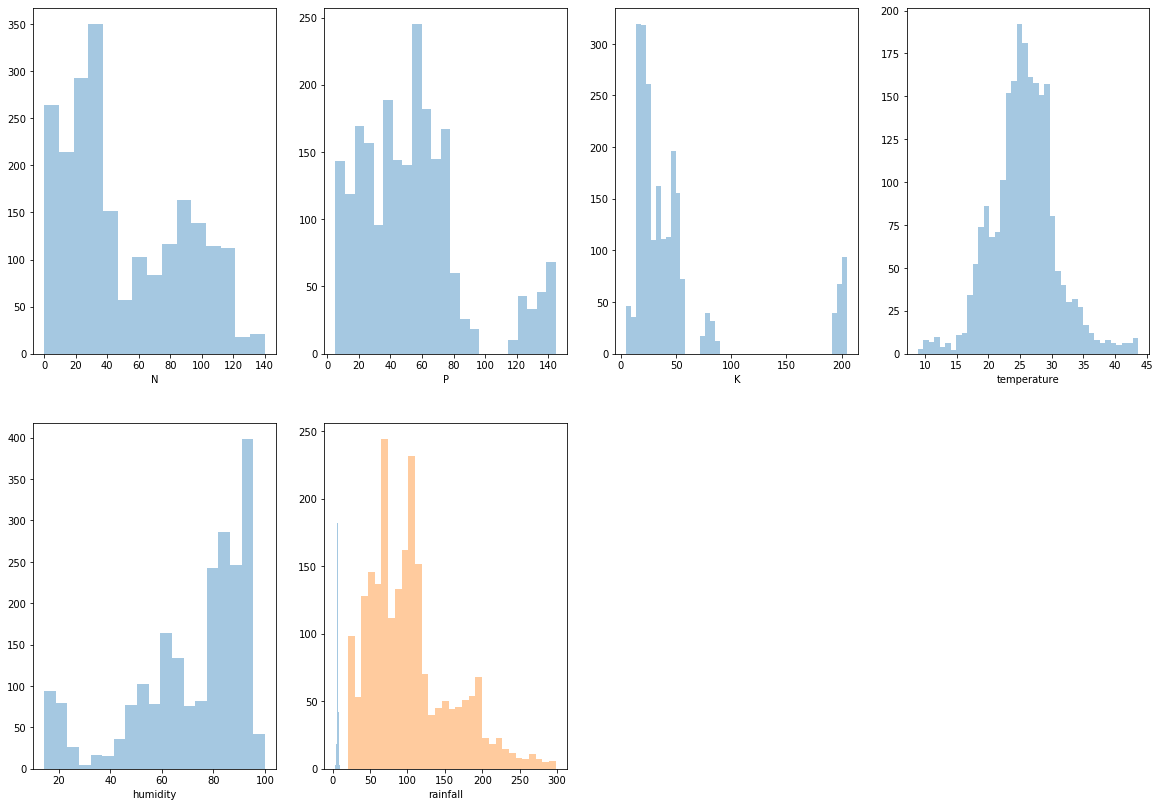

In [32]:
def plot_distplot(plot):
    sns.distplot(crop[plot], kde=False)
plt.figure(figsize=(20,14))
plt.subplot(2, 4, 1)    
plot_distplot('N')
plt.subplot(2, 4, 2)    
plot_distplot('P')
plt.subplot(2, 4, 3)    
plot_distplot('K')
plt.subplot(2, 4, 4)    
plot_distplot('temperature')
plt.subplot(2, 4, 5)    
plot_distplot('humidity')
plt.subplot(2, 4, 6)    
plot_distplot('ph')
plt.subplot(2, 4, 6)    
plot_distplot('rainfall')

C:\Users\MRANAL\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


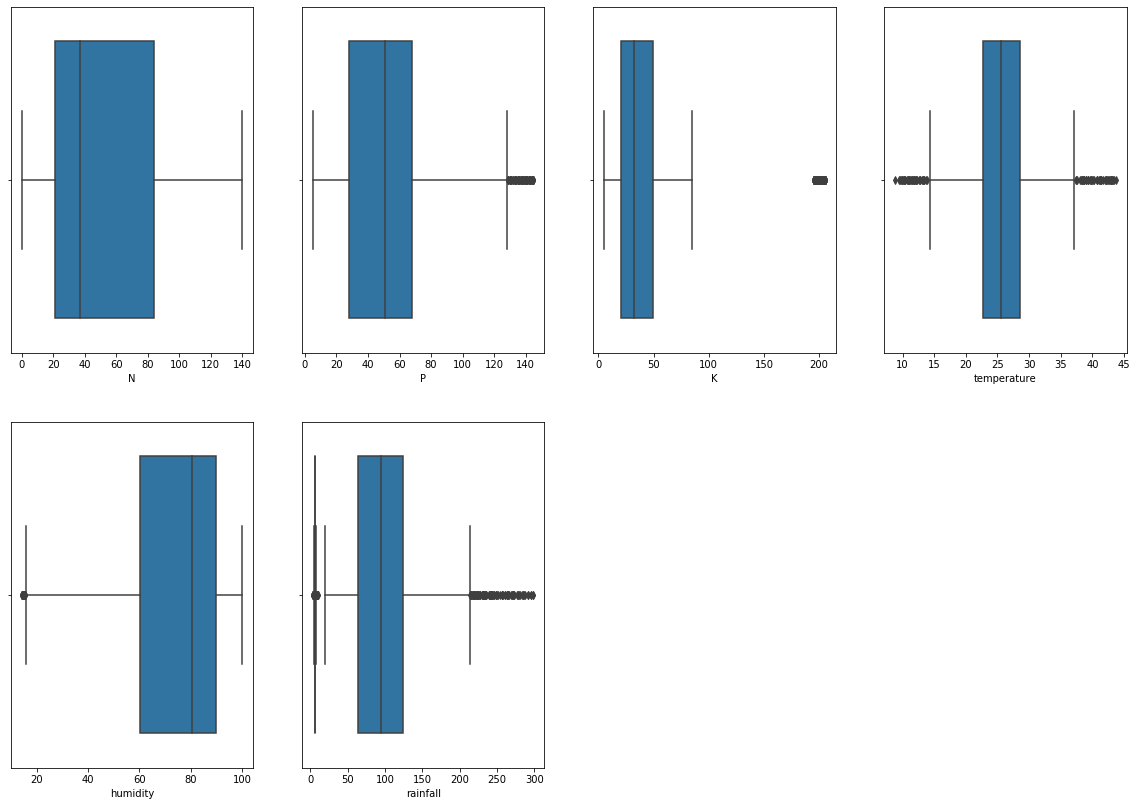

In [33]:
def plot_distplot(plot):
    sns.boxplot(crop[plot])
plt.figure(figsize=(20,14))
plt.subplot(2, 4, 1)    
plot_distplot('N')
plt.subplot(2, 4, 2)    
plot_distplot('P')
plt.subplot(2, 4, 3)    
plot_distplot('K')
plt.subplot(2, 4, 4)    
plot_distplot('temperature')
plt.subplot(2, 4, 5)    
plot_distplot('humidity')
plt.subplot(2, 4, 6)    
plot_distplot('ph')
plt.subplot(2, 4, 6)    
plot_distplot('rainfall')

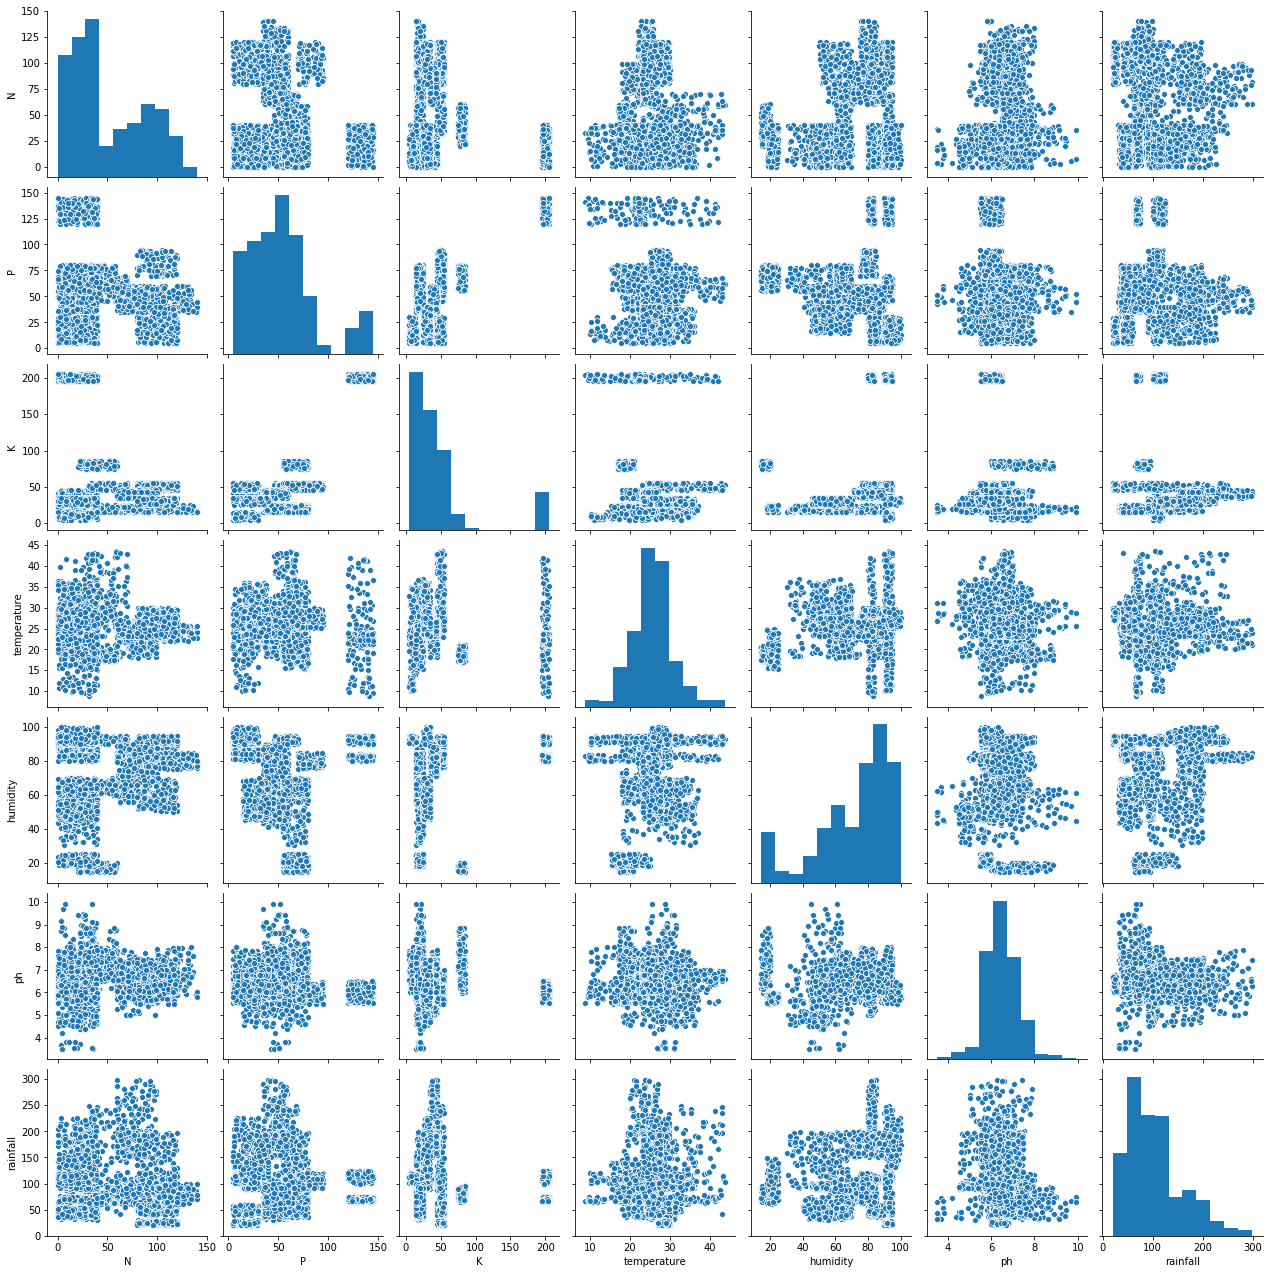

In [34]:
sns.pairplot(crop)

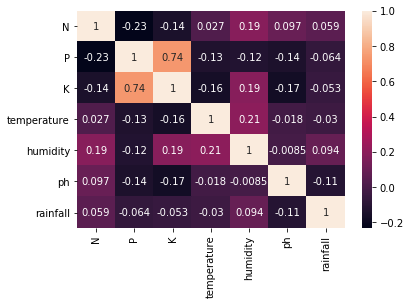

In [35]:
sns.heatmap(crop.corr(),annot=True)

#### Handling  Categorical Variable 

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
crop['label_ordinal'] = labelencoder.fit_transform(crop['label'])

In [37]:
crop.head(1000)

,N,P,K,temperature,humidity,ph,rainfall,label,label_ordinal
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
995,33,23,45,20.002190,85.836182,7.116539,112.337046,pomegranate,19
996,4,14,41,19.851393,89.807323,6.430163,102.818636,pomegranate,19
997,13,17,45,21.254336,92.650589,7.159521,106.278467,pomegranate,19
998,39,24,39,23.653741,93.326575,6.431266,109.807618,pomegranate,19


In [38]:
X = crop.iloc[:,:-2] # Independent Variable 
y = crop['label_ordinal'] # Dependent Variable

### Feature Selection

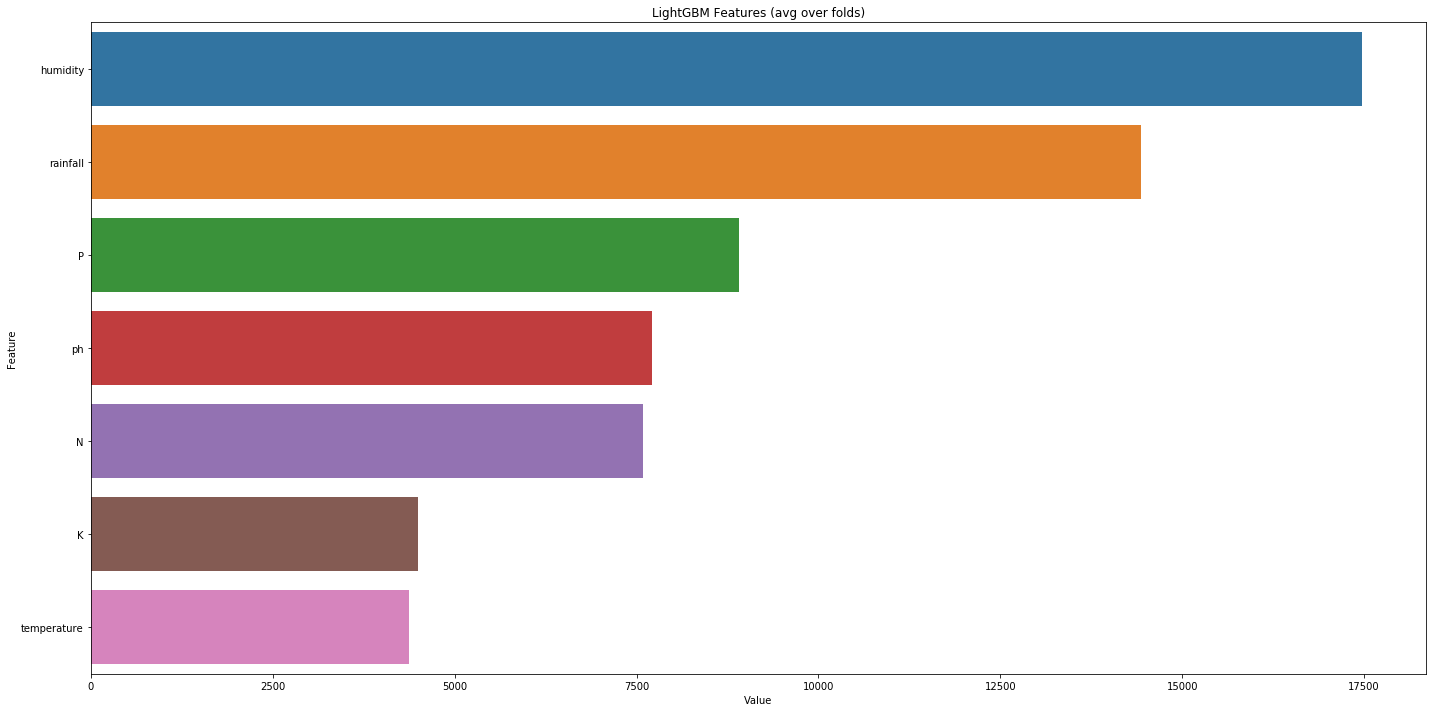

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X, y)
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

#### Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

### Model Building

In [41]:
acc = []
mod_name = []
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
models = []
models.append(('XGBoost', XGBClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))
for name, model in models:   
    mod = model
    mod.fit(X_train, y_train)
    print('{} --> Train :{}, Test : {}'.format(name, mod.score(X_train, y_train), mod.score(X_test, y_test)))
    prediction = mod.predict(X_test)
    mod_name.append(name)
    acc.append(metrics.accuracy_score(y_test,prediction))
    print('Confusion Matrix:\n {}\n'.format(metrics.confusion_matrix(y_test, prediction)))

XGBoost --> Train :1.0, Test : 0.9931818181818182
Confusion Matrix:
 [[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 26  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1

C:\Users\MRANAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


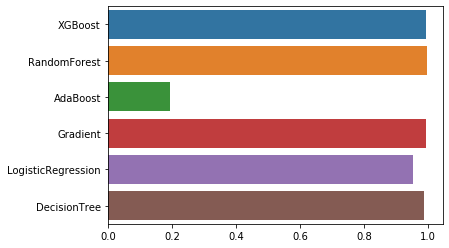

In [42]:
sns.barplot(acc,mod_name)

In [43]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

#### Training accuracy 

In [44]:
random_forest.score(X_train, y_train)

1.0

#### Test accuracy

In [45]:
random_forest.score(X_test, y_test)

0.990909090909091

#### Prediction

In [46]:
prediction = random_forest.predict(X_test)

In [47]:
data = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

In [48]:
prediction = random_forest.predict(data)

In [49]:
prediction

array([20])

#### Save Model

In [50]:
import joblib
file = 'random_forest_model.sav'
joblib.dump(random_forest, file)

['random_forest_model.sav']